In [1]:
import pandas as pd
import numpy as np
import random


import matplotlib.pyplot as plt
# import sys
from sklearn.cluster import KMeans

In [2]:
x = np.random.random_sample((10,)) * 90
for i in range(10):
    x = np.append(x, x + random.uniform(0, 1))
x = np.append(x, np.random.normal(0, 40, 30))


y = np.random.random_sample((10,)) * 90  
for i in range(10):
    y = np.append(y, y+random.uniform(0, 1))

y = np.append(y, np.random.normal(0, 40, 30))

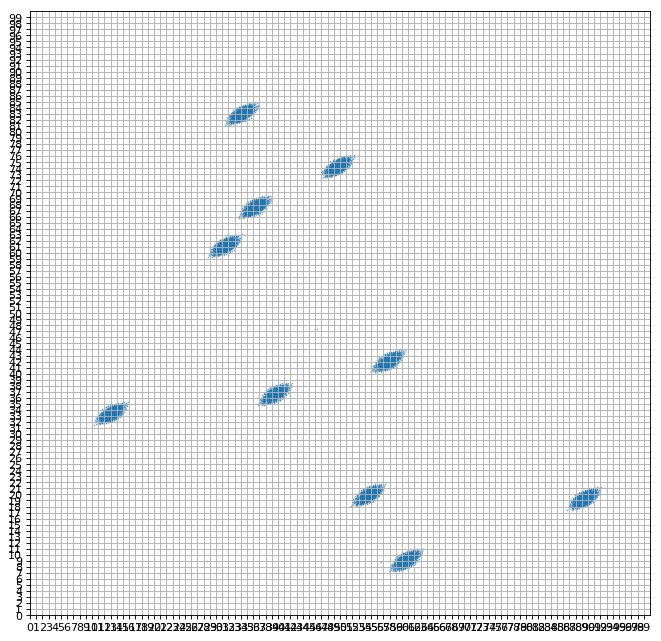

In [3]:
# This part is  a visualization only 
grid_size= 1

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.gca()
ax.set_xticks(np.arange(0, 100, grid_size))
ax.set_yticks(np.arange(0, 100, grid_size))

# plt.grid()
# plt.scatter(allData[0]['Z'], allData[0]['X'], s=0.1)
plt.scatter(x, y, s=0.1)

# Limit the axixs for visualization puroposes only
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()

plt.show()

In [4]:
cellSize=1
minValue=0
maxValue=100

# We divid the array by cell size and calculate the 
# for x 
x1= np.remainder(x , cellSize)
print(x)
print(x1)
xTransformed = x - x1
print(xTransformed)

print(x.size)

print(xTransformed)

# for y 
y1= np.remainder(y , cellSize)
yTransformed = y - y1
# print(yTransformed.size)


# agg = np.array(list(zip(xTransformed, yTransformed)))
# agg = np.column_stack((xTransformed, yTransformed))
# print(agg)


# np.array(setAgg[:,0], setAgg[:,1])

# setAgg=np.unique(agg, axis=0)

# print(setAgg.size)
# print(setAgg)

# plt.scatter(setAgg[:,0], setAgg[:,1])

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)
# plt.xlim(0, 100)
# plt.ylim(0, 100)
# plt.show()

[ 51.84871563  55.04986484  36.77792112 ...   9.77522701 -16.12747913
  41.24161069]
[0.84871563 0.04986484 0.77792112 ... 0.77522701 0.87252087 0.24161069]
[ 51.  55.  36. ...   9. -17.  41.]
10270
[ 51.  55.  36. ...   9. -17.  41.]


In [5]:
all_tuples = tuple(map(tuple, np.column_stack((xTransformed, yTransformed))))

dictCount={} 

for i in all_tuples:
    if(i in dictCount):
        dictCount[i] += 1
    else:
        dictCount[i] = 1


# print(dictCount)
# print(dictCount.values())
# values = np.asarray(dictCount.values())

values = np.fromiter(dictCount.values(), dtype=int)
# print(values.shape)
print(values)

keys = np.asarray(list(dictCount))
# print(keys)
print(keys.shape)

[  2  16   1   2   2   1   3   6   2   5  30   2  37   1  22   2   4   9
   4  12  19  16  37  41  27  46   4  51  27  20  70  28  14  27  11 124
  79  45  36  91  14  27 148 122 143 145 138  97 139  95 111 158  42   5
  17   1   2   7   2 175 175  41  91  59  11 126  45 113   3  27  13  36
   3 180  25  18 117  11 187 220 147 158 108  62 216 217 226  45 159 196
 190 133 215 160 202  28  33 108 114  50  74 186 163  75  34  53 154 110
 145 142 131 117 115  95   1   1   3   7   1   7  36  83   5   2  17   7
   5  25  66 100  54  92  84  84   1  33   1   2   6  12  47  57  17   6
  24  13  37   5  44  58  36  34  60   2   2   3   3  47  38  12  12  36
   6   7  30  37  42  40  26  14   9  37  32  33  27  22  16  10  11  11
   4   1   3   1   3   1   4  13   1   1   1   6   4   4   1   1   7   1
   3   1   3   2   1   4   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1]
(239, 2)


(10270, 2)
(10270,)


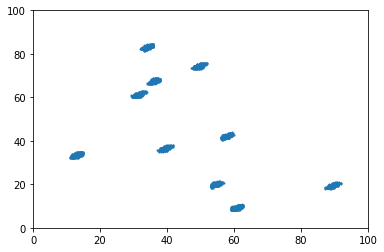

[47.34047726 87.1570629  34.09533862 ... 33.85486593 33.99570993
 91.93291826]


In [35]:
tuplesData = np.array(list(zip(x, y)))


print(tuplesData.shape)

# We hash on x^4 + y^2, so that we can have unique hash for each tuple.  
hashedData = np.array(list(map(hash, x.astype(np.int32)**4+ y.astype(np.int32)**2 )))

print(hashedData.shape)


# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python

import collections

countsDict=collections.Counter(hashedData)


# keys1 = np.asarray(list(countsDict))
# values1 = np.fromiter(countsDict.values(), dtype=int)
# print(keys1)
# print(values1)


finalX=np.array([])
finalY=np.array([])

for i in range(x.size):
    hashKey = hash(int(x[i])**4 + int(y[i])**2)
    if(hashKey in countsDict):
        if(countsDict[hashKey] > 30):
            if(random.uniform(0, 1) >= 0.5):
                finalX= np.append(finalX, x[i])
                finalY= np.append(finalY, y[i])


plt.scatter(finalX, finalY, s=1)

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

dataForClustering1 = np.array(list(zip(finalX, finalY)))                
print(finalX)

In [7]:
# How to convert 

# https://stackoverflow.com/questions/23668509/dictionary-keys-and-values-to-separate-numpy-arrays
# Dictionary keys and values to separate numpy arrays
# keys = np.fromiter(Samples.keys(), dtype=float)
# vals = np.fromiter(Samples.values(), dtype=float)


values_cliped = (values - 30).clip(min=0)
print(values_cliped)

# print(np.where( values_cliped !=0 ))


dataForClustering=keys[np.where( values_cliped !=0 )]
# print(keys)
# sorted = dataForClustering[dataForClustering[:,0].argsort()[::1]]
# print(sorted)

[  0   0   0   0   0   0   0   0   0   0   0   0   7   0   0   0   0   0
   0   0   0   0   7  11   0  16   0  21   0   0  40   0   0   0   0  94
  49  15   6  61   0   0 118  92 113 115 108  67 109  65  81 128  12   0
   0   0   0   0   0 145 145  11  61  29   0  96  15  83   0   0   0   6
   0 150   0   0  87   0 157 190 117 128  78  32 186 187 196  15 129 166
 160 103 185 130 172   0   3  78  84  20  44 156 133  45   4  23 124  80
 115 112 101  87  85  65   0   0   0   0   0   0   6  53   0   0   0   0
   0   0  36  70  24  62  54  54   0   3   0   0   0   0  17  27   0   0
   0   0   7   0  14  28   6   4  30   0   0   0   0  17   8   0   0   6
   0   0   0   7  12  10   0   0   0   7   2   3   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]


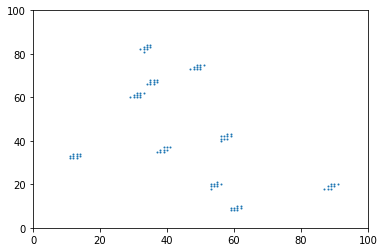

In [8]:
plt.scatter(dataForClustering[:,0], dataForClustering[:,1], s=1)

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

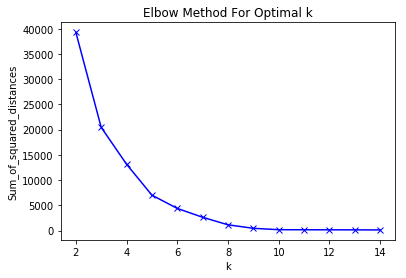

10
[[31.1        60.9       ]
 [54.22222222 19.55555556]
 [12.5        33.        ]
 [89.         19.        ]
 [49.1        73.9       ]
 [39.         36.        ]
 [57.4        41.7       ]
 [33.66666667 82.66666667]
 [60.55555556  8.88888889]
 [35.66666667 67.        ]]


In [9]:
Sum_of_squared_distances = []


K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10, random_state=0)
    km = km.fit(dataForClustering)
    Sum_of_squared_distances.append(km.inertia_)

# print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

k=1
for i in range(1, len(Sum_of_squared_distances)):
    ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
    # print(ratio)
    # 1.4 here is just a threshhold 
    if(ratio < 1.3):
        k=i+1
        break
        
print(k)


# final run with large iterations 
km = KMeans(n_clusters=k, max_iter=100, random_state=0)
km = km.fit(dataForClustering)
print(km.cluster_centers_)
